Primero que nada vamos a importar pandas, una librería que se usa en el contexto de la manipulación de datos, en específico datos tabulares como lo pueden ser hojas de cálculo, base de datos o en mi caso que son archivos .CSV, esto ya que necesitamos unificar distintos tipos de archivos .CSV que vienen de diferentes fuentes

In [1]:
import pandas as pd

Ahora vamos a importar el df1 que es el principal, cabe recalcar que la columna de comuna, no fue extraída mediante scraping, esta fue mediante la descarga de un archivo Shapely y luego mediante librerías como, shapely, geopandas, matplotlib y folium se pudieron obtener los polígonos de las comunas a partir de las coordenadas, además esto es bastante conveniente tomando en cuenta que sirve para todo el territorio de Chile, no solo la región metropolitana

In [2]:
df1 = pd.read_csv("propiedades_con_comuna.csv", encoding="utf-8", delimiter=",")
df1.head()

,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,Huechuraba
1,124089837.0,3.0,3.0,102.0,27.0,1.0,-33.563160,-70.776609,Maipú
2,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,Puente Alto
3,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,San Bernardo
4,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,Peñaflor


En el df1 aunque existan valores nulos o NaN, no los imputare, esto debido a que intenté usar KNN para imputar valores NaN y el rendimiento de los modelos disminuyó, y es que a veces es mejor no imputar datos y simplemente eliminarlos, cosa que en el caso del df2, no sucedió

In [3]:
df1.isna().sum()

precio                   11
banos                    47
dormitorios              38
superficie_total         59
superficie_construida    83
estacionamiento          30
latitud                  13
longitud                 13
comuna                   20
dtype: int64

Por el lado del df2, este fue extraído mediante scraping de datos de la mapoteca de la Biblioteca del Congreso Nacional de Chile, el cual tiene datos de todas las comunas de Chile, incluyendo datos, demográficos, sociales, salud, económicos, seguridad, educacionales y electorales, esto debido a que se extrajeron datos de 52 comunas, y cada comuna tenía 29 variables, por lo cual mediante scraping se hace la tarea mucho más amena y eficiente

In [4]:
df2 = pd.read_csv("datos_comunas_extraidos3.csv", encoding="utf-8", delimiter=",")
df2.head()

,Comuna,Población 2024,Índice Masculinidad 2024,Grupo_Etario_0_a_14_2024_(%),Grupo_Etario_15_a_29_2024_(%),Grupo_Etario_30_a_44_2024_(%),Grupo_Etario_45_a_64_2024_(%),Grupo_Etario_65_o_mas_2024_(%),IDD 2024,IAM 2024,...,Trabajadores_Enseñanza_2023,Trabajadores_Salud_2023,Trabajadores_Artísticas_Entretenimiento_2023,Trabajadores_Otras_Actividades_2023,Trabajadores_Hogares_Empleadores_2023,Trabajadores_Organizaciones_Extraterritoriales_2023,Trabajadores_Sin_Información_2023,Disponibilidad_Presupuestaria_por_Habitante_2023_(M$),Delitos Mayor Connotación Social 2023 (c/100.000 hab),Violencia Intrafamiliar 2023 (c/100.000 hab)
0,Alhué,7768,98.9,20.7,20.0,23.3,23.0,13.0,51.0,62.8,...,0,5,0,11,0,0,0,2724,1947.6,929.2
1,Buin,116969,93.6,21.3,19.6,26.5,22.2,10.4,46.4,48.7,...,1614,1788,602,433,0,0,10,341,1982.5,459.4
2,Calera de Tango,25491,97.9,18.0,21.1,20.7,26.7,13.5,46.0,74.8,...,492,70,10,778,0,0,4,487,2044.1,548.2
3,Cerrillos,85041,94.0,18.7,21.7,22.9,23.7,13.0,46.3,69.7,...,947,1179,39,645,0,0,31,335,3434.2,682.0
4,Cerro Navia,127250,96.0,17.6,21.6,20.6,25.4,14.7,47.7,83.8,...,1312,4044,25,1210,0,0,1,286,3053.7,675.3


In [5]:
guiones_total = (df2 == "-").sum().sum()
guiones_mortalidad = (df2['Mortalidad Infantil 2022 (c/1.000 nac.vivos)'] == "-").sum()

print(f'Total de NaN: {guiones_total}\n'
      f'NaN en mortalidad infantil: {guiones_mortalidad}')

Total de NaN: 4
NaN en mortalidad infantil: 4


Los modelos de machine learning son muy útiles cuando se trata de imputación de datos, y es que hay que aprovechar que disponemos de una amplia gama de variables que podemos usar para apalancarnos y usar modelos como random forest y no perder datos valiosos dentro de nuestro dataset, hay muchas herramientas que se pueden usar para imputar datos, como media, mediana, o moda, pero también se pueden usar métodos estadísticos, generalmente se usa k-Nearest Neighbors para la imputación de datos, pero yo creo que para este caso con 4 comunas sin datos para la columna de mortalidad infantil, debido a la alta cantidad de variables random forest es mejor método para la imputación para este caso

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

target = 'Mortalidad Infantil 2022 (c/1.000 nac.vivos)'
df2[target] = df2[target].replace('-', np.nan)
df2[target] = pd.to_numeric(df2[target], errors='coerce')
complete_data = df2.dropna(subset=[target])

predictores = [
    'Pobreza por ingresos 2022 (%)',
    'Pobreza multidimensional 2022 (%)',
    'Mortalidad General 2022 (c/1.000 hab)',
    'Carentes servicios básicos 2025 (%)',
    'Hogares hacinados 2025 (%)',
    'Natalidad 2022',
    'Fecundidad 2022',
    'Cantidad de: Centro de Salud Familiar (CESFAM) 2025',
    'Cantidad de: Hospital 2025',
    'Grupo_Etario_0_a_14_2024_(%)',
    'Disponibilidad_Presupuestaria_por_Habitante_2023_(M$)',
    'SIMCE 4to Básico Lectura 2022'
]


In [7]:
X_train = complete_data[predictores]
y_train = complete_data[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

missing_mask = df2[target].isnull()
X_missing = df2.loc[missing_mask, predictores]
predicted_values = model.predict(X_missing)

df2.loc[missing_mask, target] = np.round(predicted_values, 1)

Luego de tener los 2 datasets, lo que hice fue hacerles un "merge" que consiste en unir estos 2 datasets, utilizando la columna ['comuna'] como una especie de llave o "key" que alimenta con más variables cada fila

In [8]:
df1['comuna'] = df1['comuna'].str.strip().str.lower()
df2['Comuna'] = df2['Comuna'].str.strip().str.lower()

df2.columns = df2.columns.str.lower()
df = pd.merge(df1, df2, on='comuna', how='left')

df.head()

,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna,población 2024,...,trabajadores_enseñanza_2023,trabajadores_salud_2023,trabajadores_artísticas_entretenimiento_2023,trabajadores_otras_actividades_2023,trabajadores_hogares_empleadores_2023,trabajadores_organizaciones_extraterritoriales_2023,trabajadores_sin_información_2023,disponibilidad_presupuestaria_por_habitante_2023_(m$),delitos mayor connotación social 2023 (c/100.000 hab),violencia intrafamiliar 2023 (c/100.000 hab)
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,huechuraba,101808.0,...,1910.0,744.0,350.0,3679.0,0.0,0.0,69.0,454.0,2357.9,475.0
1,124089837.0,3.0,3.0,102.0,27.0,1.0,-33.563160,-70.776609,maipú,503635.0,...,10699.0,5117.0,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2
2,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,puente alto,568086.0,...,13782.0,11608.0,192.0,2299.0,2.0,0.0,49.0,192.0,2173.4,535.9
3,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,san bernardo,306371.0,...,10211.0,4028.0,118.0,1233.0,0.0,0.0,26.0,349.0,2747.8,573.1
4,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,peñaflor,94402.0,...,1768.0,904.0,53.0,118.0,0.0,0.0,11.0,206.0,1535.0,496.1


Luego lo que vamos a hacer es crear un archivo CSV a partir del df, y vamos a importar las coordenadas de todos los hospitales y estaciones de metro, estos al igual que el caso de los datos de las comunas, son extraídos a partir de archivos Shapely mediante python y respectivas librerías ya mencionadas, estas coordenadas de hospitales y metros son usadas para luego calcular la distancia lineal entre las casas y el hospital y metro más cercano

In [9]:
df.to_csv('datos_unificados.csv', index=False, encoding='utf-8')
df_hospitales = pd.read_csv("coordenadas_hospitales_publicos_rm.csv", encoding="utf-8", delimiter=",")
df_metro = pd.read_csv("coordenadas_estaciones_metro.csv", encoding="utf-8", delimiter=",")

In [10]:
df.head()

,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna,población 2024,...,trabajadores_enseñanza_2023,trabajadores_salud_2023,trabajadores_artísticas_entretenimiento_2023,trabajadores_otras_actividades_2023,trabajadores_hogares_empleadores_2023,trabajadores_organizaciones_extraterritoriales_2023,trabajadores_sin_información_2023,disponibilidad_presupuestaria_por_habitante_2023_(m$),delitos mayor connotación social 2023 (c/100.000 hab),violencia intrafamiliar 2023 (c/100.000 hab)
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,huechuraba,101808.0,...,1910.0,744.0,350.0,3679.0,0.0,0.0,69.0,454.0,2357.9,475.0
1,124089837.0,3.0,3.0,102.0,27.0,1.0,-33.563160,-70.776609,maipú,503635.0,...,10699.0,5117.0,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2
2,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,puente alto,568086.0,...,13782.0,11608.0,192.0,2299.0,2.0,0.0,49.0,192.0,2173.4,535.9
3,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,san bernardo,306371.0,...,10211.0,4028.0,118.0,1233.0,0.0,0.0,26.0,349.0,2747.8,573.1
4,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,peñaflor,94402.0,...,1768.0,904.0,53.0,118.0,0.0,0.0,11.0,206.0,1535.0,496.1


La siguiente celda lo que hace es calcular la distancia entre la coordenada de la casa, y la coordenada del hospital más cercano y luego crear una columna llamada 'distancia_hospital' y agregarla al data frame

In [11]:
prop_coords = df[['latitud', 'longitud']].to_numpy()
hospital_coords = df_hospitales[['latitud hospital', 'longitud hospital']].to_numpy()

prop_coords_rad = np.radians(prop_coords)
hospital_coords_rad = np.radians(hospital_coords)

def haversine_vectorized(coord1, coord2):
    R = 6371000 

    lat1 = coord1[:, 0][:, np.newaxis]
    lon1 = coord1[:, 1][:, np.newaxis]
    lat2 = coord2[:, 0]
    lon2 = coord2[:, 1]

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  

dist_matrix = haversine_vectorized(prop_coords_rad, hospital_coords_rad)
df['distancia_hospital'] = dist_matrix.min(axis=1)
df


,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna,población 2024,...,trabajadores_salud_2023,trabajadores_artísticas_entretenimiento_2023,trabajadores_otras_actividades_2023,trabajadores_hogares_empleadores_2023,trabajadores_organizaciones_extraterritoriales_2023,trabajadores_sin_información_2023,disponibilidad_presupuestaria_por_habitante_2023_(m$),delitos mayor connotación social 2023 (c/100.000 hab),violencia intrafamiliar 2023 (c/100.000 hab),distancia_hospital
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,huechuraba,101808.0,...,744.0,350.0,3679.0,0.0,0.0,69.0,454.0,2357.9,475.0,8064.787023
1,124089837.0,3.0,3.0,102.0,27.0,1.0,-33.563160,-70.776609,maipú,503635.0,...,5117.0,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2,6113.888686
2,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,puente alto,568086.0,...,11608.0,192.0,2299.0,2.0,0.0,49.0,192.0,2173.4,535.9,845.094730
3,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,san bernardo,306371.0,...,4028.0,118.0,1233.0,0.0,0.0,26.0,349.0,2747.8,573.1,5475.616211
4,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,peñaflor,94402.0,...,904.0,53.0,118.0,0.0,0.0,11.0,206.0,1535.0,496.1,1600.028166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,742425000.0,5.0,5.0,370.0,230.0,0.0,-33.421135,-70.553193,las condes,296134.0,...,33022.0,7363.0,27163.0,0.0,78.0,1044.0,1164.0,808.7,172.6,4638.577959
5966,69709800.0,1.0,2.0,88.0,70.0,0.0,-33.513907,-70.783665,maipú,503635.0,...,5117.0,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2,1078.534716
5967,75000000.0,2.0,4.0,100.0,80.0,0.0,-33.416357,-70.765798,cerro navia,127250.0,...,4044.0,25.0,1210.0,0.0,0.0,1.0,286.0,3053.7,675.3,2381.181842
5968,859650000.0,5.0,6.0,1000.0,320.0,0.0,-34.147102,-71.462988,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55220.407889


La siguiente celda lo que hace es lo mismo que la celda anterior, pero la diferencia es que aquí nosotros calculamos la distancia al punto de coordenadas de estación de metro más cercano y creamos la columna llamada 'distancia_metro' que luego es agregada al dataframe, hay que tomar en cuenta que para poder saber la distancia lineal en metros, se requiere del radio de la tierra en metros definido en la variable R que aparece en la celda de abajo

In [12]:
prop_coords = df[['latitud', 'longitud']].to_numpy()
metro_coords = df_metro[['latitud_estacion_metro', 'longitud_estacion_metro']].to_numpy()

prop_coords_rad = np.radians(prop_coords)
metro_coords_rad = np.radians(metro_coords)

def haversine_vectorized(coord1, coord2):
    R = 6371000  

    lat1 = coord1[:, 0][:, np.newaxis]
    lon1 = coord1[:, 1][:, np.newaxis]
    lat2 = coord2[:, 0]
    lon2 = coord2[:, 1]

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

dist_matrix = haversine_vectorized(prop_coords_rad, metro_coords_rad)

df['distancia_metro'] = dist_matrix.min(axis=1)

df


,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna,población 2024,...,trabajadores_artísticas_entretenimiento_2023,trabajadores_otras_actividades_2023,trabajadores_hogares_empleadores_2023,trabajadores_organizaciones_extraterritoriales_2023,trabajadores_sin_información_2023,disponibilidad_presupuestaria_por_habitante_2023_(m$),delitos mayor connotación social 2023 (c/100.000 hab),violencia intrafamiliar 2023 (c/100.000 hab),distancia_hospital,distancia_metro
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,huechuraba,101808.0,...,350.0,3679.0,0.0,0.0,69.0,454.0,2357.9,475.0,8064.787023,2554.229150
1,124089837.0,3.0,3.0,102.0,27.0,1.0,-33.563160,-70.776609,maipú,503635.0,...,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2,6113.888686,6127.575990
2,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,puente alto,568086.0,...,192.0,2299.0,2.0,0.0,49.0,192.0,2173.4,535.9,845.094730,2324.734493
3,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,san bernardo,306371.0,...,118.0,1233.0,0.0,0.0,26.0,349.0,2747.8,573.1,5475.616211,11151.846959
4,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,peñaflor,94402.0,...,53.0,118.0,0.0,0.0,11.0,206.0,1535.0,496.1,1600.028166,16662.321199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,742425000.0,5.0,5.0,370.0,230.0,0.0,-33.421135,-70.553193,las condes,296134.0,...,7363.0,27163.0,0.0,78.0,1044.0,1164.0,808.7,172.6,4638.577959,1526.624955
5966,69709800.0,1.0,2.0,88.0,70.0,0.0,-33.513907,-70.783665,maipú,503635.0,...,791.0,3197.0,0.0,3.0,98.0,283.0,2012.4,503.2,1078.534716,2485.915755
5967,75000000.0,2.0,4.0,100.0,80.0,0.0,-33.416357,-70.765798,cerro navia,127250.0,...,25.0,1210.0,0.0,0.0,1.0,286.0,3053.7,675.3,2381.181842,3924.559734
5968,859650000.0,5.0,6.0,1000.0,320.0,0.0,-34.147102,-71.462988,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55220.407889,96236.455245


Luego de todo esto ya tenemos listos todos los datos en nuestro df, el siguiente paso que procede es hacer un EDA inicial, esto debido a que necesitamos saber como se distribuyen los datos en cada variable del df, esto mediante 2 herramientas muy importantes y útiles que son los histogramas y los gráficos boxplot, con histogramas se nos permite de mejor forma poder ver que tipo de distribución tienen las variables independientes, estos primeros histogramas nos sirven para poder identificar valores atípicos y su tratamiento. Además, hay que tomar en cuenta que excluimos a las variables extraídas por webscraping de las comunas, esto debido a que estas son datos de instituciones gubernamentales y su fiabilidad es alta y la existencia de outliers es prácticamente imposible.

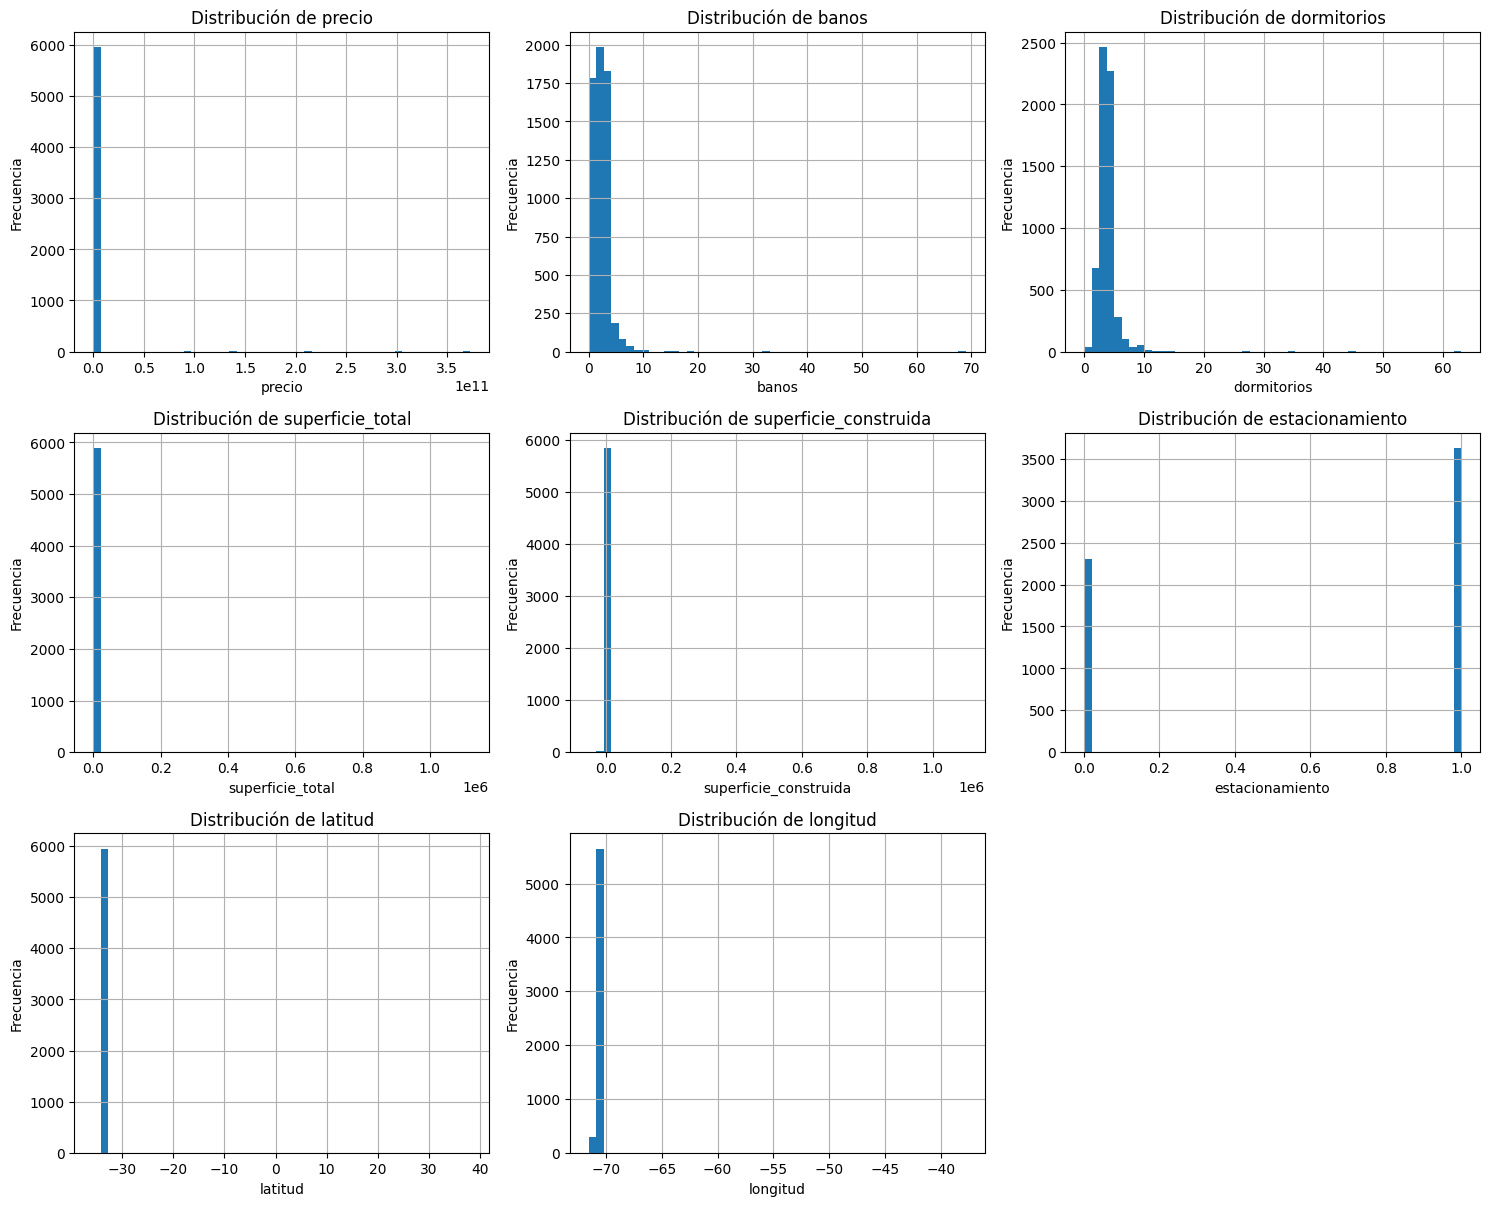

In [13]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Por otro lado, los gráficos boxplot nos dan otra cara de la moneda de las variables, mientras que con los histogramas podemos identificar valores atípicos, la mayor utilidad de los histogramas es para visualizar que tipo de distribución siguen los datos (normal, sesgada o multimodal), mientras que los gráficos boxplot nos ayudan también a identificar la distribución de los datos, pero su mayor utilidad es para identificar los valores atípicos que tiene cada variable

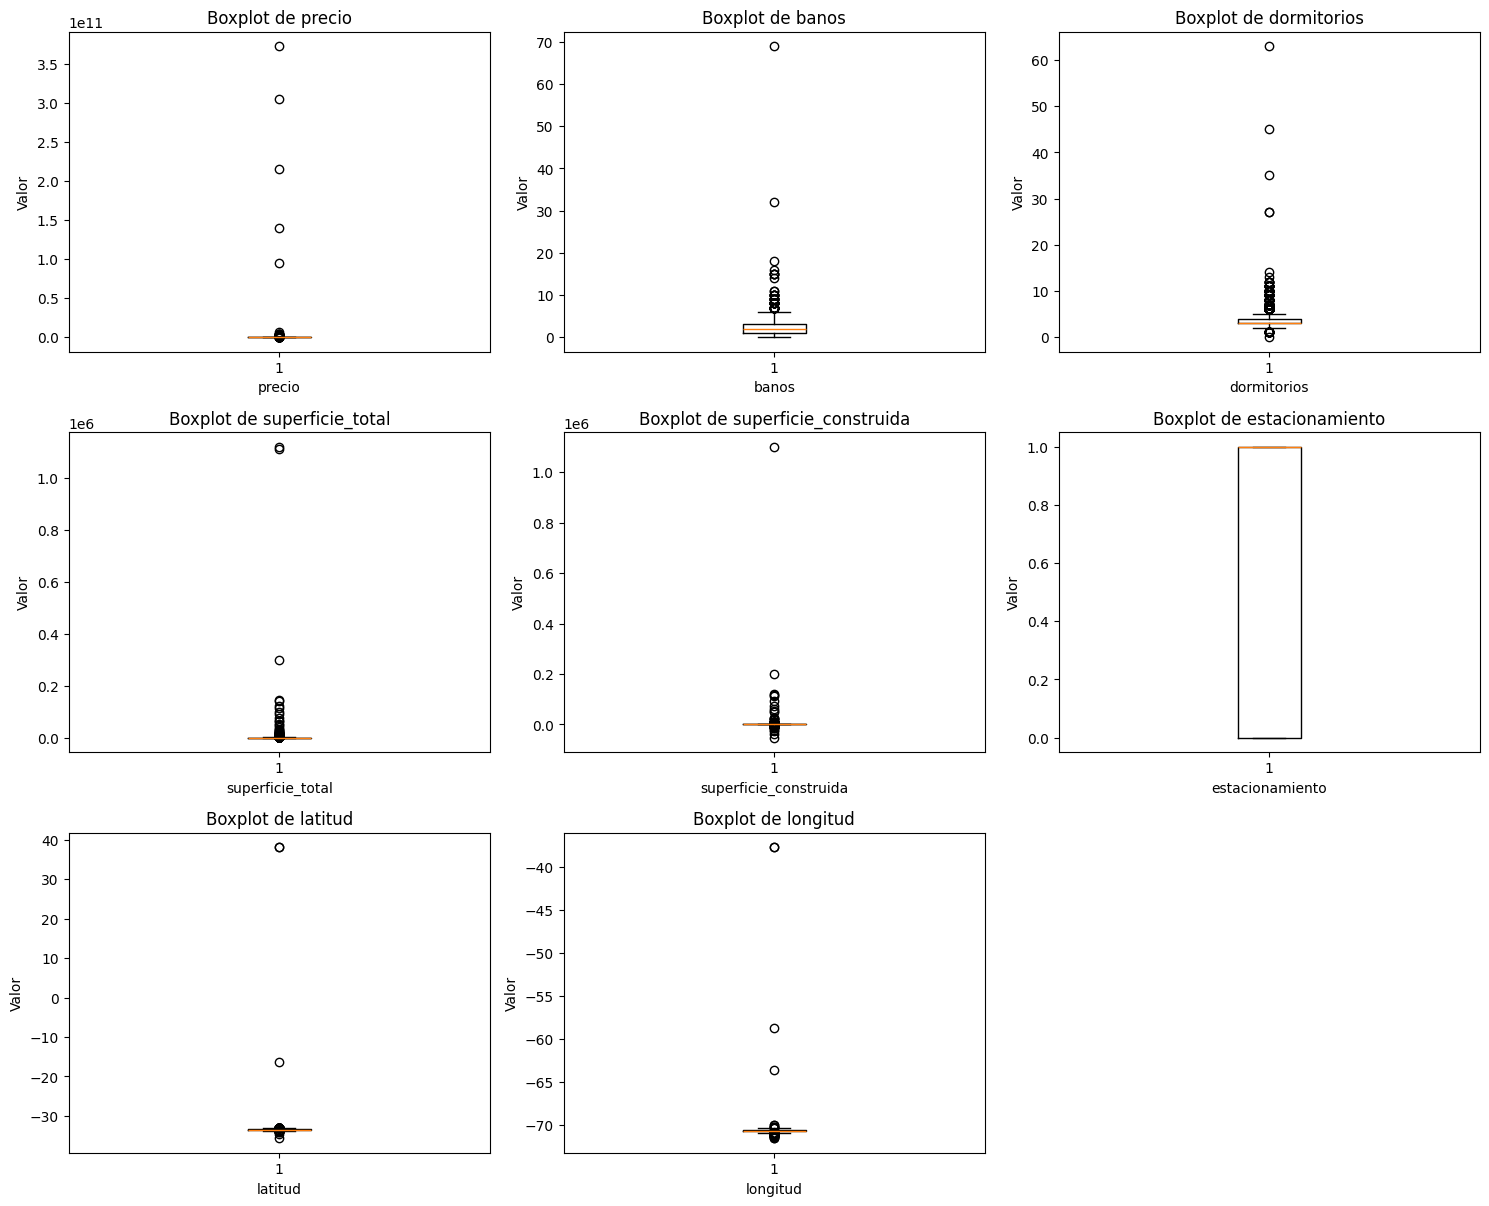

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Valor')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Gracias a los boxplots e histogramas, podemos printear la cantidad de valores que estan por arriba, por debajo, y entre medio de ciertos limites como se puede observar en la celda de abajo, cabe recalcar que este es un proceso iterativo, y de ánalisis profundo en el comportamiento del fénomeno de estudio para decidir que método de limpieza se va a utilizar

In [15]:
precio_bajo = df[df['precio'] < 20000000] 
print(f"Registros con precio < 20M CLP: {len(precio_bajo)}")
precio_alto = df[df['precio'] > 900000000] 
print(f"Registros con precio >900M CLP: {len(precio_alto)}")
superficie_cero = df[df['superficie_total'] <= 50]  # Menos de 5 m² es imposible
print(f"Registros con superficie_total ≤ 50 m²: {len(superficie_cero)}")
superficie_alta = df[df['superficie_total'] > 1500]  # Menos de 5 m² es imposible
print(f"Registros con superficie_total > 1500 m²: {len(superficie_alta)}")
superficie_construida_baja = df[df['superficie_construida'] <= 10]  # Menos de 5 m² es imposible
print(f"Registros con superficie_construida ≤ 10 m²: {len(superficie_construida_baja)}")
superficie_construida_alta = df[df['superficie_construida'] > 1000]  # Menos de 5 m² es imposible
print(f"Registros con superficie_construida > 1500 m²: {len(superficie_construida_alta)}")
sin_dormitorios = df[(df['dormitorios'] <= 1)]
print(f"Registros con 1 o menos dormitorios: {len(sin_dormitorios)}")
sin_dormitorios = df[(df['banos'] == 0)]
print(f"Registros con 0 baños: {len(sin_dormitorios)}")
con_dormitorios = df[(df['banos'] >= 10)]
print(f"Registros con 10 baños o más: {len(con_dormitorios)}")

Registros con precio < 20M CLP: 41
Registros con precio >900M CLP: 180
Registros con superficie_total ≤ 50 m²: 73
Registros con superficie_total > 1500 m²: 291
Registros con superficie_construida ≤ 10 m²: 340
Registros con superficie_construida > 1500 m²: 110
Registros con 1 o menos dormitorios: 34
Registros con 0 baños: 2
Registros con 10 baños o más: 17


Luego de ver la frecuencia de datos dentro de ciertos intervalos, tomamos la decisión de borrarlos, hay varios outliers que o por error de tipeo no nos sirven en el dataset, como los precios demasiado altos, que se comportan de forma distinta, como casas con precios mayores a 900 millones de pesos, que tienen atributos distintos y capturan un comportamiento y fénomeno distinto al que yo quiero predecir, como casas con grandes terrenos y con cultivos, piscinas, huertos, etc... por lo que en este caso específico se precindira de ellos

In [16]:
df = df[
    (df['precio'] > 20000000) &          
    (df['precio'] < 900000000) &        
    (df['superficie_total'] < 1500) & 
    (df['superficie_total'] > 30) & 
    (df['dormitorios'] >= 1) & 
    (df['superficie_construida'] < 1000) &   
    (df['superficie_construida'] > 10) &
    (df['banos'] <= 10) & 
    (df['banos'] > 0) 
]

In [17]:
len(df)

5061

In [18]:
print(f"Filas antes de eliminar duplicados: {len(df)}")
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {len(df)}")

Filas antes de eliminar duplicados: 5061
Filas después de eliminar duplicados: 4840


In [19]:
print(df.columns.tolist())

['precio', 'banos', 'dormitorios', 'superficie_total', 'superficie_construida', 'estacionamiento', 'latitud', 'longitud', 'comuna', 'población 2024', 'índice masculinidad 2024', 'grupo_etario_0_a_14_2024_(%)', 'grupo_etario_15_a_29_2024_(%)', 'grupo_etario_30_a_44_2024_(%)', 'grupo_etario_45_a_64_2024_(%)', 'grupo_etario_65_o_mas_2024_(%)', 'idd 2024', 'iam 2024', 'pobreza por ingresos 2022 (%)', 'pobreza multidimensional 2022 (%)', 'pueblos indígenas 2025 (%)', 'extranjeros 2025 (%)', 'carentes servicios básicos 2025 (%)', 'hogares hacinados 2025 (%)', 'cantidad de: atención remota 2025', 'cantidad de: centro comunitario de salud familiar (cecosf) 2025', 'cantidad de: centro comunitario de salud mental  (cosam) 2025', 'cantidad de: centro corporación para la nutrición infantil (conin) 2025', 'cantidad de: centro de apoyo comunitario para personas con demencia 2025', 'cantidad de: centro diagnóstico terapéutico y tratamiento privado (cdt) 2025', 'cantidad de: centro de diálisis 2025', 

Luego de una limpieza de cada variable, podemos volver a visualizar con histogramas y boxplots el comportamiento de cada una de las variables, y con ello poder identificar que forma de distribución tienen las variables y si es que es necesario ser más agresivos con el data cleaning o si se requiere tomar un enfoque más conservador

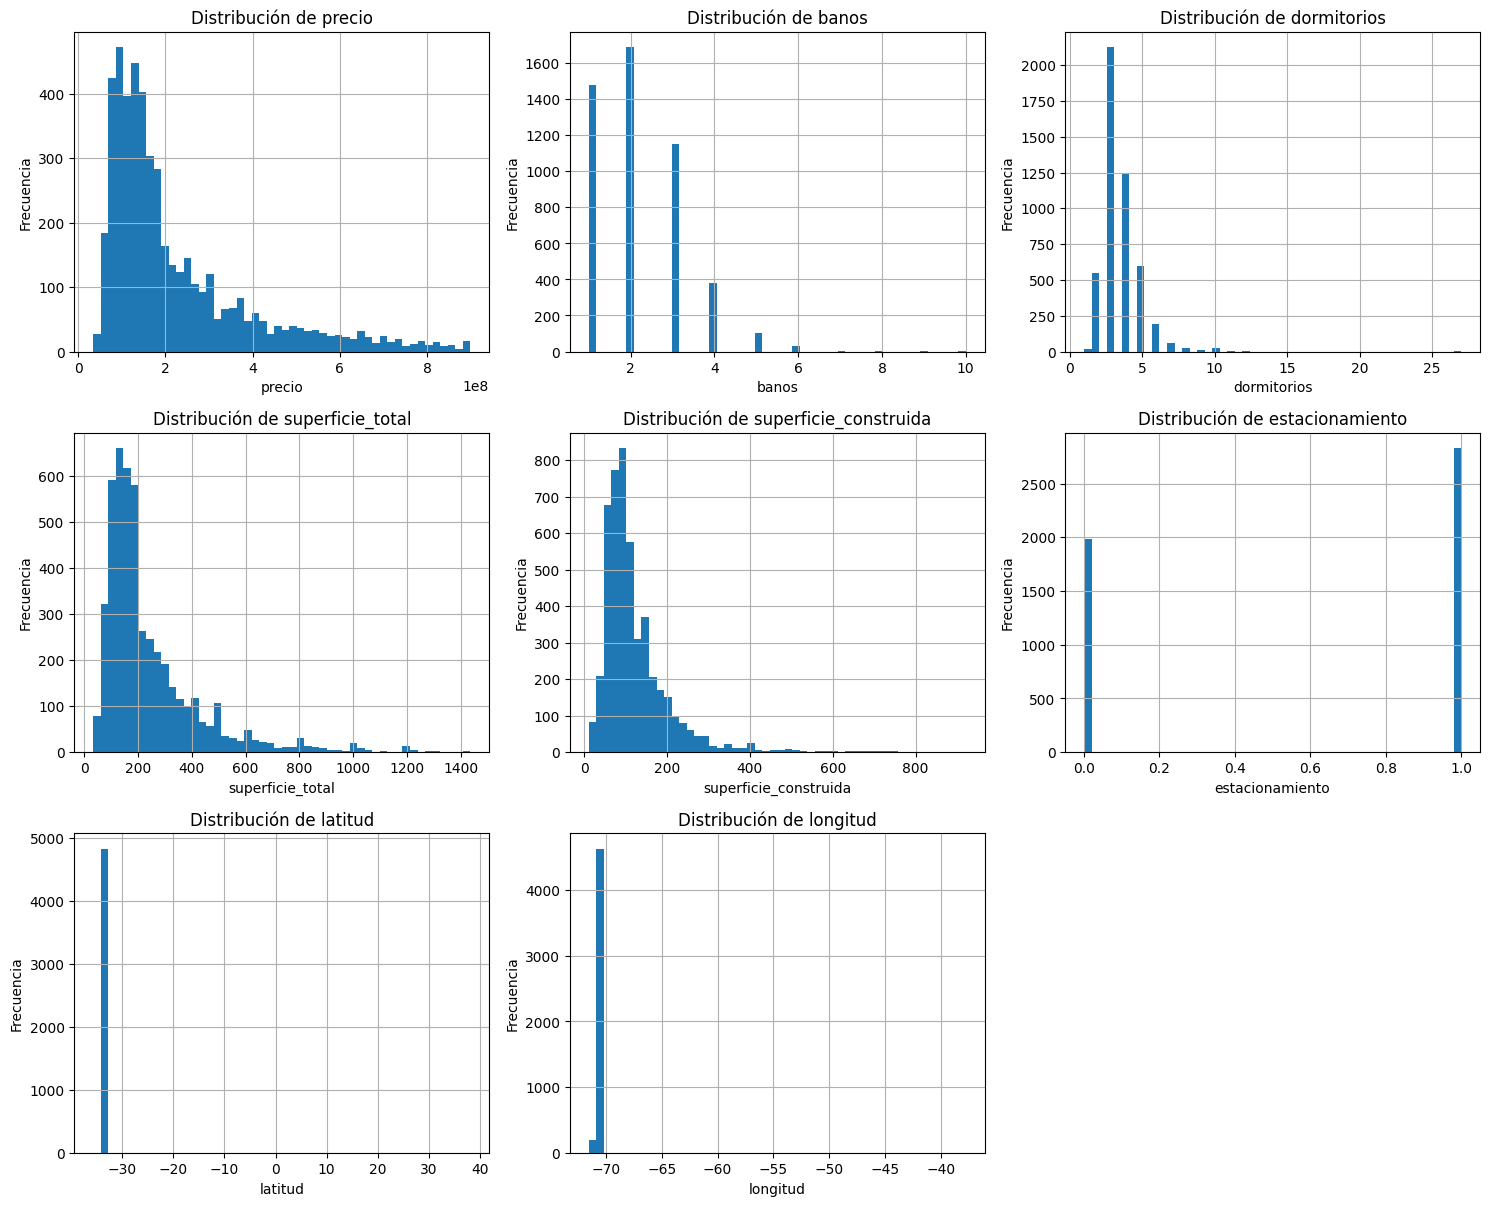

In [20]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Ahora podemos ver un mejor comportamiento de los gráficos boxplots al eliminar outliers, y aunque todavía quedan algunos valores que caen lejos de los rangos definidos por los cuartiles, siguen siendo útiles y beneficiosos para el modelo, ya que estos representan la forma sesgada de la variable

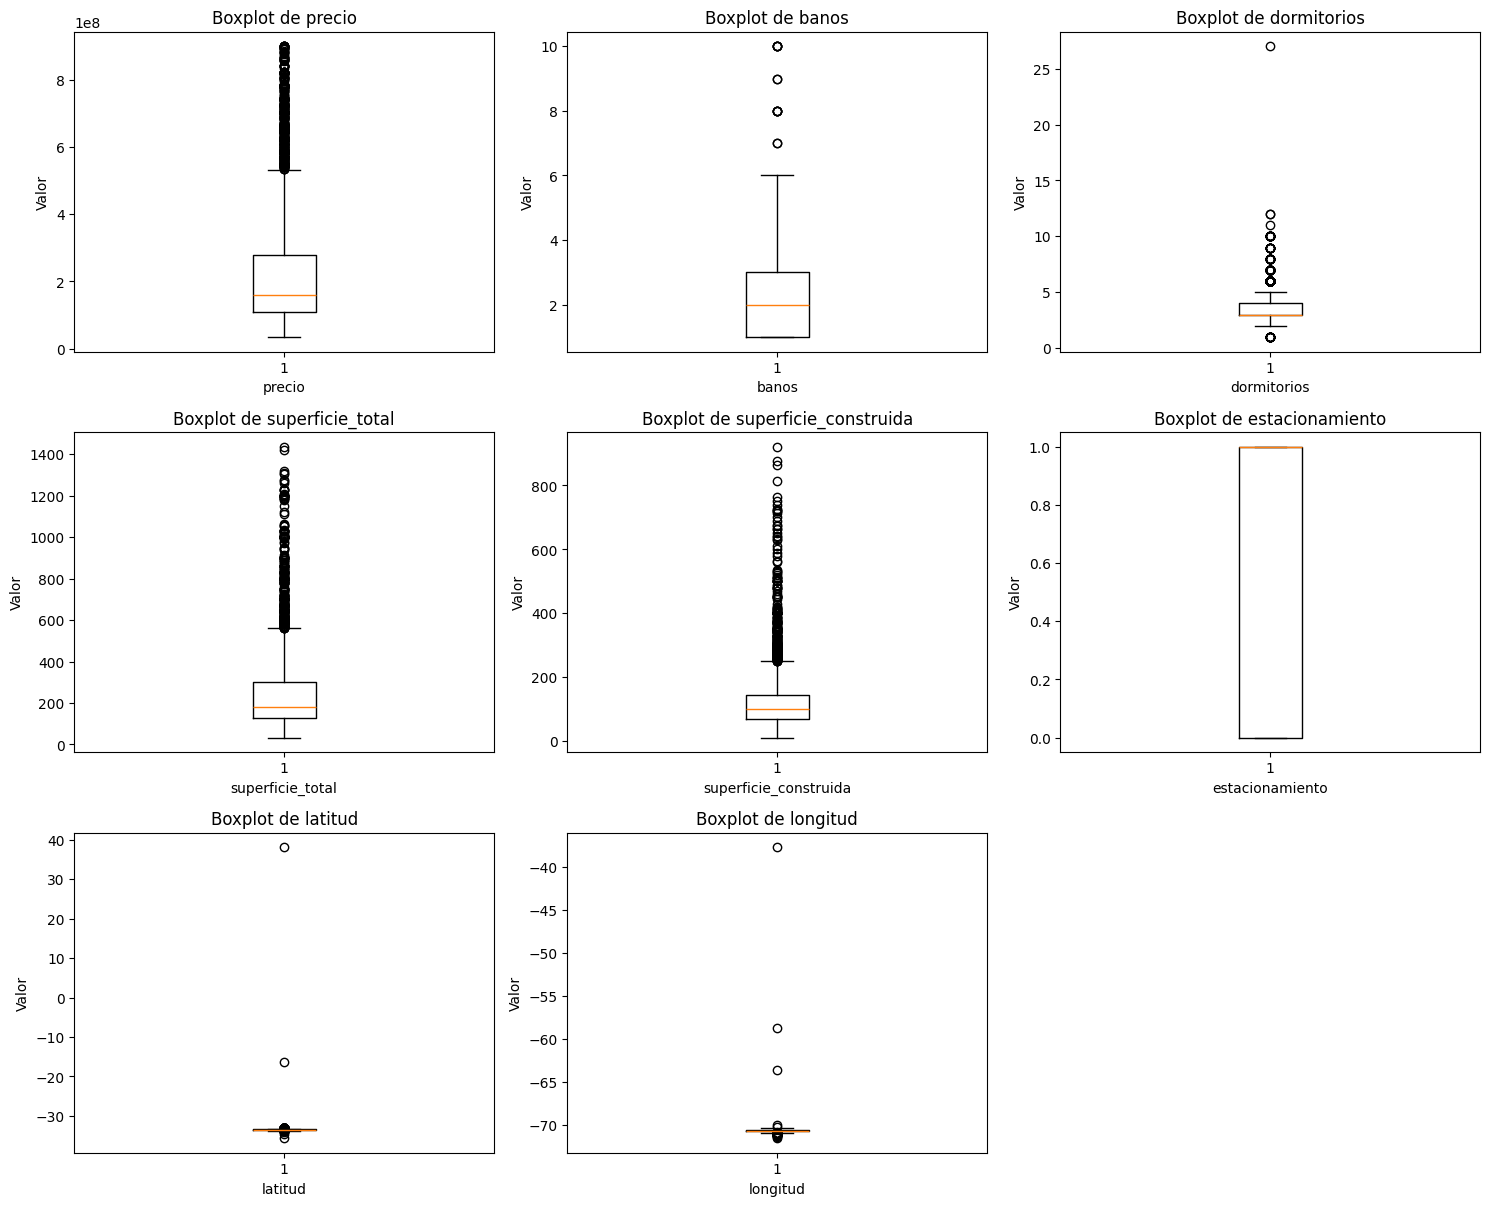

In [21]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Valor')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Para poder trabajar correctamente con la columna de 'comuna' se requiere usar herramientas de encoding, esto debido a que random forest, xgboost y lgbm no pueden trabajar con strings(palabras), por lo que se requiere que se transformen a números, hay varios tipos de encoding, one-hot encoding, label encoding, o embedding, el que voy a usar es el label-encoding, el cual le asigna una secuencia de números a las categorías únicas de la variable, por ejemplo Alhué es 1 Buin 2 y así sucesivamente

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['comuna'] = le.fit_transform(df['comuna'])

In [23]:
df = df.dropna()

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [25]:
y = df['precio']
X = df.drop(columns=['precio'])

y_binned = pd.qcut(y, q=10, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")

Tamaño conjunto entrenamiento: (3851, 144)
Tamaño conjunto prueba: (963, 144)


In [26]:
preprocessor = Pipeline([
    ('scaler', RobustScaler())
])

In [27]:
def calculate_metrics(y_true, y_pred):
    """Calcula todas las métricas requeridas"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    mae_percentage = (mae / y_true.mean()) * 100
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'MAE': mae,
        'MAE_%': mae_percentage,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

In [28]:
def cv_log_corrected(pipeline, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mae_scores = []
    r2_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        y_train_log_fold = np.log1p(y_train_fold)
        pipeline.fit(X_train_fold, y_train_log_fold)
        
        y_pred_log_fold = pipeline.predict(X_val_fold)
        y_pred_original_fold = np.expm1(y_pred_log_fold)
        
        mae_scores.append(mean_absolute_error(y_val_fold, y_pred_original_fold))
        r2_scores.append(r2_score(y_val_fold, y_pred_original_fold))
    
    return np.array(mae_scores), np.array(r2_scores)


In [29]:
print("RANDOM FOREST")

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
metrics_rf = calculate_metrics(y_test, y_pred_rf)

for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.3f}")

RANDOM FOREST
MAE: 38294147.506
MAE_%: 17.162
RMSE: 60315939.536
R²: 0.870
MAPE: 20.772


In [30]:
print("XGBOOST")

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=4,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        verbosity=0
    ))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)

for metric, value in metrics_xgb.items():
    print(f"{metric}: {value:.3f}")

XGBOOST
MAE: 38438261.362
MAE_%: 17.227
RMSE: 60019538.326
R²: 0.872
MAPE: 21.224


In [31]:
import os
os.environ['LIGHTGBM_VERBOSE'] = '0' 

print("\n" + "="*40)
print("LIGHTGBM")
print("="*40)

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=4,
        random_state=42,
        verbose=-1
    ))
])

lgbm_pipeline.fit(X_train, y_train)
y_pred_lgbm = lgbm_pipeline.predict(X_test)
metrics_lgbm = calculate_metrics(y_test, y_pred_lgbm)

for metric, value in metrics_lgbm.items():
    print(f"{metric}: {value:.3f}")


LIGHTGBM


Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\dayth\anaconda3\envs\dsprojects\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\dayth\anaconda3\envs\dsprojects\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\dayth\anaconda3\envs\dsprojects\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\dayth\anaconda3\envs\dsprojects\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 116: invalid start byte


MAE: 38287197.020
MAE_%: 17.159
RMSE: 58918410.852
R²: 0.876
MAPE: 21.006


In [32]:
resultados = {
    'Modelo': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MAE': [metrics_rf['MAE'], metrics_xgb['MAE'], metrics_lgbm['MAE']],
    'MAE_%': [metrics_rf['MAE_%'], metrics_xgb['MAE_%'], metrics_lgbm['MAE_%']],
    'RMSE': [metrics_rf['RMSE'], metrics_xgb['RMSE'], metrics_lgbm['RMSE']],
    'R²': [metrics_rf['R²'], metrics_xgb['R²'], metrics_lgbm['R²']],
    'MAPE': [metrics_rf['MAPE'], metrics_xgb['MAPE'], metrics_lgbm['MAPE']]
}

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('MAE')

print(df_resultados.to_string(index=False, float_format='%.3f'))

mejor_modelo_final = df_resultados.iloc[0]['Modelo']
print(f"\nMEJOR MODELO: {mejor_modelo_final}")

       Modelo          MAE  MAE_%         RMSE    R²   MAPE
     LightGBM 38287197.020 17.159 58918410.852 0.876 21.006
Random Forest 38294147.506 17.162 60315939.536 0.870 20.772
      XGBoost 38438261.362 17.227 60019538.326 0.872 21.224

MEJOR MODELO: LightGBM


In [33]:
print("VALIDACIÓN CRUZADA - ANÁLISIS R² (K=5)")

pipelines_cv = {
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline,
    'LightGBM': lgbm_pipeline
}

cv_results = {}

for name, pipeline in pipelines_cv.items():
    cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    cv_results[name] = {
        'CV_R²_mean': cv_r2.mean(),
        'CV_R²_std': cv_r2.std(),
        'CV_R²_scores': cv_r2
    }

print("Resultados de Validación Cruzada (R²):")
for modelo, resultados in cv_results.items():
    print(f"{modelo}:")
    print(f"  R² promedio: {resultados['CV_R²_mean']:.4f}")
    print(f"  R² desviación estándar: {resultados['CV_R²_std']:.4f}")
    print(f"  R² por fold: {[f'{score:.4f}' for score in resultados['CV_R²_scores']]}") 
    print()

mejor_cv_modelo = max(cv_results.items(), key=lambda x: x[1]['CV_R²_mean'])
print(f"🏆 MEJOR MODELO EN CV: {mejor_cv_modelo[0]} (R² = {mejor_cv_modelo[1]['CV_R²_mean']:.4f})")

VALIDACIÓN CRUZADA - ANÁLISIS R² (K=5)
Resultados de Validación Cruzada (R²):
Random Forest:
  R² promedio: 0.8569
  R² desviación estándar: 0.0156
  R² por fold: ['0.8386', '0.8759', '0.8686', '0.8630', '0.8383']

XGBoost:
  R² promedio: 0.8564
  R² desviación estándar: 0.0107
  R² por fold: ['0.8414', '0.8702', '0.8603', '0.8631', '0.8468']

LightGBM:
  R² promedio: 0.8572
  R² desviación estándar: 0.0139
  R² por fold: ['0.8378', '0.8758', '0.8628', '0.8648', '0.8449']

🏆 MEJOR MODELO EN CV: LightGBM (R² = 0.8572)


In [34]:
rf_imp = rf_pipeline.named_steps['model'].feature_importances_
xgb_imp = xgb_pipeline.named_steps['model'].feature_importances_
lgbm_imp = lgbm_pipeline.named_steps['model'].feature_importances_

rf_norm = rf_imp / rf_imp.sum()
xgb_norm = xgb_imp / xgb_imp.sum()
lgbm_norm = lgbm_imp / lgbm_imp.sum()

df = pd.DataFrame({
    'feature': X_train.columns,
    'RF': rf_norm,
    'XGB': xgb_norm,
    'LGBM': lgbm_norm
})
df['Average'] = (df['RF'] + df['XGB'] + df['LGBM']) / 3
df = df.sort_values('Average', ascending=False)

print(f"{'Rank':<4} {'Feature':<35} {'Average':<8} {'RF':<8} {'XGB':<8} {'LGBM':<8}")
print("-" * 80)

for i, (_, row) in enumerate(df.head(20).iterrows(), 1):
    feature_name = row['feature'][:34] if len(row['feature']) > 34 else row['feature']
    print(f"{i:<4} {feature_name:<35} {row['Average']:<8.4f} "
          f"{row['RF']:<8.4f} {row['XGB']:<8.4f} {row['LGBM']:<8.4f}")
    
top_20_variables = df.head(20)['feature'].tolist()


Rank Feature                             Average  RF       XGB      LGBM    
--------------------------------------------------------------------------------
1    matrícula particular pagado 2024    0.2013   0.2436   0.3278   0.0326  
2    superficie_total                    0.1850   0.3100   0.0391   0.2058  
3    simce 4to básico lectura 2022       0.1157   0.1217   0.2130   0.0126  
4    banos                               0.0589   0.0591   0.0200   0.0978  
5    superficie_construida               0.0586   0.0601   0.0144   0.1012  
6    longitud                            0.0399   0.0232   0.0068   0.0898  
7    simce 4to básico matemáticas 2022   0.0317   0.0629   0.0300   0.0023  
8    latitud                             0.0302   0.0162   0.0047   0.0698  
9    distancia_metro                     0.0293   0.0125   0.0029   0.0726  
10   distancia_hospital                  0.0244   0.0115   0.0024   0.0595  
11   empresas_otras_actividades_2023     0.0218   0.0049   0.0558   0.00

In [35]:
X_reduced = X[top_20_variables]

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y_binned
)

In [36]:
print("RANDOM FOREST")

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        max_samples=None,
        max_features='sqrt',
        random_state=42
    ))
])

rf_pipeline.fit(X_train_reduced, y_train_reduced)
y_pred_rf = rf_pipeline.predict(X_test_reduced)
metrics_rf = calculate_metrics(y_test_reduced, y_pred_rf)

for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.3f}")

RANDOM FOREST
MAE: 40249704.890
MAE_%: 18.039
RMSE: 62336728.161
R²: 0.862
MAPE: 22.823


In [37]:
print("XGBOOST")

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=4,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        verbosity=0
    ))
])

xgb_pipeline.fit(X_train_reduced, y_train_reduced)
y_pred_xgb = xgb_pipeline.predict(X_test_reduced)
metrics_xgb = calculate_metrics(y_test_reduced, y_pred_xgb)

for metric, value in metrics_xgb.items():
    print(f"{metric}: {value:.3f}")

XGBOOST
MAE: 38706901.375
MAE_%: 17.347
RMSE: 59958289.404
R²: 0.872
MAPE: 21.347


In [38]:
print("LIGHTGBM")

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=4,
        random_state=42,
        verbose=-1,
        num_leaves=50,
        min_child_samples=1
    ))
])

lgbm_pipeline.fit(X_train_reduced, y_train_reduced)
y_pred_lgbm = lgbm_pipeline.predict(X_test_reduced)
metrics_lgbm = calculate_metrics(y_test_reduced, y_pred_lgbm)

for metric, value in metrics_lgbm.items():
    print(f"{metric}: {value:.3f}")

LIGHTGBM
MAE: 38970515.156
MAE_%: 17.465
RMSE: 60930174.583
R²: 0.868
MAPE: 21.420


In [39]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import warnings
import pandas as pd

optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

class TqdmCallback:
    def __init__(self, n_trials):
        self.pbar = tqdm(
            total=n_trials, 
            desc="🌲 Optimizing RF",
            bar_format='{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}] {postfix}',
            ncols=100
        )
        self.best_score = float('-inf')
        
    def __call__(self, study, trial):
        if study.best_value > self.best_score:
            self.best_score = study.best_value
            
        self.pbar.update(1)
        self.pbar.set_postfix({
            'Best': f'{-self.best_score:.0f}',  
            'Current': f'{-trial.value:.0f}' if trial.value else 'Failed'
        })
        
    def close(self):
        self.pbar.close()

def objective(trial):
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': bootstrap,
        'random_state': 42
    }
    
    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.7, 1.0)
    
    rf_pipeline_trial = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(**params))
    ])
    
    scores = cross_val_score(
        rf_pipeline_trial, 
        X_train_reduced, 
        y_train_reduced, 
        cv=3,  
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    return scores.mean()

def print_comparison_table(metrics_original, metrics_optimized):
    comparison_data = {
        'Modelo Original': [
            f"{metrics_original['MAE']:.0f}",
            f"{metrics_original['MAE_%']:.2f}%",
            f"{metrics_original['RMSE']:.0f}",
            f"{metrics_original['R²']:.4f}",
            f"{metrics_original['MAPE']:.2f}%"
        ],
        'Modelo Optimizado': [
            f"{metrics_optimized['MAE']:.0f}",
            f"{metrics_optimized['MAE_%']:.2f}%",
            f"{metrics_optimized['RMSE']:.0f}",
            f"{metrics_optimized['R²']:.4f}",
            f"{metrics_optimized['MAPE']:.2f}%"
        ],
        'Mejora': []
    }
    
    # Calcular mejoras
    for metric in ['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE']:
        if metric == 'R²':
            improvement = ((metrics_optimized[metric] - metrics_original[metric]) / abs(metrics_original[metric])) * 100
        else:
            improvement = ((metrics_original[metric] - metrics_optimized[metric]) / abs(metrics_original[metric])) * 100
        comparison_data['Mejora'].append(f"{improvement:+.2f}%")
    
    df_comparison = pd.DataFrame(comparison_data, 
                                index=['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE'])
    
    print("📊 COMPARACIÓN DE MÉTRICAS")
    print("="*60)
    print(df_comparison.to_string())

def print_hyperparams_and_importance_table(original_params, best_params, importances):
    all_params = set(original_params.keys()) | set(best_params.keys())
    
    comparison_data = {
        'Modelo Original': [],
        'Modelo Optimizado': [],
        'Importancia': [],
        'Porcentaje': []
    }
    
    param_names = []
    for param in sorted(all_params):
        param_names.append(param)
        original_value = original_params.get(param, 'N/A')
        optimized_value = best_params.get(param, 'N/A')
        
        comparison_data['Modelo Original'].append(str(original_value))
        comparison_data['Modelo Optimizado'].append(str(optimized_value))
        
        if importances and param in importances:
            importance = importances[param]
            comparison_data['Importancia'].append(f"{importance:.4f}")
            comparison_data['Porcentaje'].append(f"{(importance/sum(importances.values()))*100:.1f}%")
        else:
            comparison_data['Importancia'].append('N/A')
            comparison_data['Porcentaje'].append('N/A')
    
    df_combined = pd.DataFrame(comparison_data, index=param_names)
    
    if importances:
        df_combined['sort_key'] = df_combined['Importancia'].apply(
            lambda x: float(x) if x != 'N/A' else 0
        )
        df_combined = df_combined.sort_values('sort_key', ascending=False).drop('sort_key', axis=1)
    
    print("\n🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA")
    print("="*90)
    print(df_combined.to_string())

study = optuna.create_study(
    direction='maximize', 
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=3)
)

n_trials = 75  

callback = TqdmCallback(n_trials)

try:
    study.optimize(objective, n_trials=n_trials, callbacks=[callback], show_progress_bar=False)
finally:
    callback.close()

print("\n🎯 RESULTADOS DE LA OPTIMIZACIÓN")
print("="*60)
print(f"Mejor score: {study.best_value:.4f}")
print(f"Trials completados: {len(study.trials)} | Trials podados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")

print("\n🔄 Entrenando modelo final con mejores parámetros...")

best_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(**study.best_params, random_state=42))
])

best_rf_pipeline.fit(X_train_reduced, y_train_reduced)

y_pred_rf_optimized = best_rf_pipeline.predict(X_test_reduced)

metrics_rf_optimized = calculate_metrics(y_test_reduced, y_pred_rf_optimized)

original_params = {
    'bootstrap': True,  
    'max_depth': 10,          
    'max_features': 'sqrt',
    'min_samples_leaf': 5,     
    'min_samples_split': 10,  
    'n_estimators': 100,
    'max_samples': None        
}

print_comparison_table(metrics_rf, metrics_rf_optimized)

try:
    importances = optuna.importance.get_param_importances(study)
except:
    importances = {}

print_hyperparams_and_importance_table(original_params, study.best_params, importances)

print("\n🎉 ¡Optimización completada!")

🌲 Optimizing RF: 100%|█| 75/75 [03:49<00:00,  3.06s/it] , Best=4223652841184394, Current=4288970198



🎯 RESULTADOS DE LA OPTIMIZACIÓN
Mejor score: -4223652841184394.5000
Trials completados: 75 | Trials podados: 0

🔄 Entrenando modelo final con mejores parámetros...
📊 COMPARACIÓN DE MÉTRICAS
      Modelo Original Modelo Optimizado   Mejora
MAE          40249705          36748321   +8.70%
MAE_%          18.04%            16.47%   +8.70%
RMSE         62336728          58300761   +6.47%
R²             0.8615            0.8789   +2.01%
MAPE           22.82%            20.16%  +11.67%

🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA
                  Modelo Original   Modelo Optimizado Importancia Porcentaje
min_samples_split              10                   2      0.2590      25.9%
max_features                 sqrt                None      0.2482      24.8%
bootstrap                    True                True      0.1994      19.9%
n_estimators                  100                 141      0.1624      16.2%
max_depth                      10                  24      0.0873       8.7%
min_

In [40]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

class TqdmCallback:
    def __init__(self, n_trials):
        self.pbar = tqdm(
            total=n_trials, 
            desc="🚀 Optimizing XGB",
            bar_format='{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}] {postfix}',
            ncols=100
        )
        self.best_score = float('-inf')
        
    def __call__(self, study, trial):
        if study.best_value > self.best_score:
            self.best_score = study.best_value
            
        self.pbar.update(1)
        self.pbar.set_postfix({
            'Best': f'{-self.best_score:.0f}',  
            'Current': f'{-trial.value:.0f}' if trial.value else 'Failed'
        })
        
    def close(self):
        self.pbar.close()

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1
    }
    
    xgb_pipeline_trial = Pipeline([
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(**params))
    ])
    
    scores = cross_val_score(
        xgb_pipeline_trial, 
        X_train_reduced, 
        y_train_reduced, 
        cv=3,  
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    return scores.mean()

def print_comparison_table_xgb(metrics_original, metrics_optimized):
    comparison_data = {
        'Modelo Original': [
            f"{metrics_original['MAE']:.0f}",
            f"{metrics_original['MAE_%']:.2f}%",
            f"{metrics_original['RMSE']:.0f}",
            f"{metrics_original['R²']:.4f}",
            f"{metrics_original['MAPE']:.2f}%"
        ],
        'Modelo Optimizado': [
            f"{metrics_optimized['MAE']:.0f}",
            f"{metrics_optimized['MAE_%']:.2f}%",
            f"{metrics_optimized['RMSE']:.0f}",
            f"{metrics_optimized['R²']:.4f}",
            f"{metrics_optimized['MAPE']:.2f}%"
        ],
        'Mejora': []
    }

    for metric in ['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE']:
        if metric == 'R²':
            improvement = ((metrics_optimized[metric] - metrics_original[metric]) / abs(metrics_original[metric])) * 100
        else:
            improvement = ((metrics_original[metric] - metrics_optimized[metric]) / abs(metrics_original[metric])) * 100
        comparison_data['Mejora'].append(f"{improvement:+.2f}%")
    
    df_comparison = pd.DataFrame(comparison_data, 
                                index=['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE'])
    
    print("📊 COMPARACIÓN DE MÉTRICAS - XGBOOST")
    print("="*60)
    print(df_comparison.to_string())

def print_hyperparams_and_importance_table_xgb(original_params, best_params, importances):
    all_params = set(original_params.keys()) | set(best_params.keys())
    
    comparison_data = {
        'Modelo Original': [],
        'Modelo Optimizado': [],
        'Importancia': [],
        'Porcentaje': []
    }
    
    param_names = []
    for param in sorted(all_params):
        param_names.append(param)
        original_value = original_params.get(param, 'N/A')
        optimized_value = best_params.get(param, 'N/A')
        
        comparison_data['Modelo Original'].append(str(original_value))
        comparison_data['Modelo Optimizado'].append(str(optimized_value))
        
        if importances and param in importances:
            importance = importances[param]
            comparison_data['Importancia'].append(f"{importance:.4f}")
            comparison_data['Porcentaje'].append(f"{(importance/sum(importances.values()))*100:.1f}%")
        else:
            comparison_data['Importancia'].append('N/A')
            comparison_data['Porcentaje'].append('N/A')
    
    df_combined = pd.DataFrame(comparison_data, index=param_names)
    
    if importances:
        df_combined['sort_key'] = df_combined['Importancia'].apply(
            lambda x: float(x) if x != 'N/A' else 0
        )
        df_combined = df_combined.sort_values('sort_key', ascending=False).drop('sort_key', axis=1)
    
    print("\n🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA - XGBOOST")
    print("="*90)
    print(df_combined.to_string())

study_xgb = optuna.create_study(
    direction='maximize', 
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_startup_trials=15, n_warmup_steps=5)
)

n_trials = 100  

callback = TqdmCallback(n_trials)

try:
    study_xgb.optimize(objective_xgb, n_trials=n_trials, callbacks=[callback], show_progress_bar=False)
finally:
    callback.close()

print("\n🎯 RESULTADOS DE LA OPTIMIZACIÓN - XGBOOST")
print("="*60)
print(f"Mejor score: {study_xgb.best_value:.4f}")
print(f"Trials completados: {len(study_xgb.trials)} | Trials podados: {len([t for t in study_xgb.trials if t.state == optuna.trial.TrialState.PRUNED])}")

best_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(**study_xgb.best_params, random_state=42, verbosity=0))
])

best_xgb_pipeline.fit(X_train_reduced, y_train_reduced)

y_pred_xgb_optimized = best_xgb_pipeline.predict(X_test_reduced)

metrics_xgb_optimized = calculate_metrics(y_test_reduced, y_pred_xgb_optimized)

original_params_xgb = {
    'n_estimators': 150,
    'learning_rate': 0.05,
    'max_depth': 4,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'min_child_weight': 1,      
    'subsample': 1.0,            
    'colsample_bytree': 1.0,     
    'colsample_bylevel': 1.0,   
    'gamma': 0.0                
}

print_comparison_table_xgb(metrics_xgb, metrics_xgb_optimized)

try:
    importances_xgb = optuna.importance.get_param_importances(study_xgb)
except:
    importances_xgb = {}

print_hyperparams_and_importance_table_xgb(original_params_xgb, study_xgb.best_params, importances_xgb)

print("\n🎉 ¡Optimización XGBoost completada!")

🚀 Optimizing XGB: 100%|█| 100/100 [00:46<00:00,  2.16it/s] , Best=3993103963425556, Current=4119159



🎯 RESULTADOS DE LA OPTIMIZACIÓN - XGBOOST
Mejor score: -3993103963425555.5000
Trials completados: 100 | Trials podados: 0
📊 COMPARACIÓN DE MÉTRICAS - XGBOOST
      Modelo Original Modelo Optimizado  Mejora
MAE          38706901          36709186  +5.16%
MAE_%          17.35%            16.45%  +5.16%
RMSE         59958289          57702878  +3.76%
R²             0.8719            0.8813  +1.08%
MAPE           21.35%            20.10%  +5.86%

🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA - XGBOOST
                  Modelo Original   Modelo Optimizado Importancia Porcentaje
learning_rate                0.05  0.0599911819385972      0.6233      62.3%
n_estimators                  150                 136      0.2446      24.5%
max_depth                       4                  10      0.0941       9.4%
colsample_bylevel             1.0  0.6437528292694777      0.0092       0.9%
colsample_bytree              1.0  0.7612516867469551      0.0071       0.7%
reg_lambda                    1.

In [43]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

class TqdmCallback:
    def __init__(self, n_trials):
        self.pbar = tqdm(
            total=n_trials, 
            desc="💡 Optimizing LGBM",
            bar_format='{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}] {postfix}',
            ncols=100
        )
        self.best_score = float('-inf')
        
    def __call__(self, study, trial):
        if study.best_value > self.best_score:
            self.best_score = study.best_value
            
        self.pbar.update(1)
        self.pbar.set_postfix({
            'Best': f'{-self.best_score:.0f}',  
            'Current': f'{-trial.value:.0f}' if trial.value else 'Failed'
        })
        
    def close(self):
        self.pbar.close()

def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', -1, 15),  
        'num_leaves': trial.suggest_int('num_leaves', 15, 300),  
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50), 
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
        'random_state': 42,
        'verbose': -1,
        'n_jobs': -1
    }
    
    if params['max_depth'] != -1:
        max_leaves = 2 ** params['max_depth']
        if params['num_leaves'] >= max_leaves:
            params['num_leaves'] = max(15, max_leaves - 1)  
    
    params['num_leaves'] = max(15, params['num_leaves'])
    
    try:
        lgbm_pipeline_trial = Pipeline([
            ('preprocessor', preprocessor),
            ('model', lgb.LGBMRegressor(**params))
        ])
        
        scores = cross_val_score(
            lgbm_pipeline_trial, 
            X_train_reduced, 
            y_train_reduced, 
            cv=3,  
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        return scores.mean()
    
    except Exception as e:
        print(f"Error en trial: {e}")
        return float('-inf')

def print_comparison_table_lgbm(metrics_original, metrics_optimized):
    comparison_data = {
        'Modelo Original': [
            f"{metrics_original['MAE']:.0f}",
            f"{metrics_original['MAE_%']:.2f}%",
            f"{metrics_original['RMSE']:.0f}",
            f"{metrics_original['R²']:.4f}",
            f"{metrics_original['MAPE']:.2f}%"
        ],
        'Modelo Optimizado': [
            f"{metrics_optimized['MAE']:.0f}",
            f"{metrics_optimized['MAE_%']:.2f}%",
            f"{metrics_optimized['RMSE']:.0f}",
            f"{metrics_optimized['R²']:.4f}",
            f"{metrics_optimized['MAPE']:.2f}%"
        ],
        'Mejora': []
    }
    
    for metric in ['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE']:
        if metric == 'R²':
            improvement = ((metrics_optimized[metric] - metrics_original[metric]) / abs(metrics_original[metric])) * 100
        else:
            improvement = ((metrics_original[metric] - metrics_optimized[metric]) / abs(metrics_original[metric])) * 100
        comparison_data['Mejora'].append(f"{improvement:+.2f}%")
    
    df_comparison = pd.DataFrame(comparison_data, 
                                index=['MAE', 'MAE_%', 'RMSE', 'R²', 'MAPE'])
    
    print("📊 COMPARACIÓN DE MÉTRICAS - LIGHTGBM")
    print("="*60)
    print(df_comparison.to_string())

def print_hyperparams_and_importance_table_lgbm(original_params, best_params, importances):
    all_params = set(original_params.keys()) | set(best_params.keys())
    
    comparison_data = {
        'Modelo Original': [],
        'Modelo Optimizado': [],
        'Importancia': [],
        'Porcentaje': []
    }
    
    param_names = []
    for param in sorted(all_params):
        param_names.append(param)
        original_value = original_params.get(param, 'N/A')
        optimized_value = best_params.get(param, 'N/A')
        
        comparison_data['Modelo Original'].append(str(original_value))
        comparison_data['Modelo Optimizado'].append(str(optimized_value))
        
        if importances and param in importances:
            importance = importances[param]
            comparison_data['Importancia'].append(f"{importance:.4f}")
            comparison_data['Porcentaje'].append(f"{(importance/sum(importances.values()))*100:.1f}%")
        else:
            comparison_data['Importancia'].append('N/A')
            comparison_data['Porcentaje'].append('N/A')
    
    df_combined = pd.DataFrame(comparison_data, index=param_names)
    
    if importances:
        df_combined['sort_key'] = df_combined['Importancia'].apply(
            lambda x: float(x) if x != 'N/A' else 0
        )
        df_combined = df_combined.sort_values('sort_key', ascending=False).drop('sort_key', axis=1)
    
    print("\n🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA - LIGHTGBM")
    print("="*90)
    print(df_combined.to_string())

study_lgbm = optuna.create_study(
    direction='maximize', 
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_startup_trials=15, n_warmup_steps=5)
)

n_trials = 100  

callback = TqdmCallback(n_trials)

try:
    study_lgbm.optimize(objective_lgbm, n_trials=n_trials, callbacks=[callback], show_progress_bar=False)
finally:
    callback.close()

print("\n🎯 RESULTADOS DE LA OPTIMIZACIÓN - LIGHTGBM")
print("="*60)
print(f"Mejor score: {study_lgbm.best_value:.4f}")
print(f"Trials completados: {len(study_lgbm.trials)} | Trials podados: {len([t for t in study_lgbm.trials if t.state == optuna.trial.TrialState.PRUNED])}")

best_lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMRegressor(**study_lgbm.best_params, random_state=42, verbose=-1))
])

best_lgbm_pipeline.fit(X_train_reduced, y_train_reduced)

y_pred_lgbm_optimized = best_lgbm_pipeline.predict(X_test_reduced)

metrics_lgbm_optimized = calculate_metrics(y_test_reduced, y_pred_lgbm_optimized)

original_params_lgbm = {
    'n_estimators': 150,
    'learning_rate': 0.05,
    'max_depth': 4,
    'num_leaves': 50,
    'min_child_samples': 1,
    'min_child_weight': 1e-3,  
    'subsample': 1.0,             
    'subsample_freq': 0,         
    'colsample_bytree': 1.0,     
    'reg_alpha': 0.0,            
    'reg_lambda': 0.0,            
    'min_split_gain': 0.0       
}

print_comparison_table_lgbm(metrics_lgbm, metrics_lgbm_optimized)

try:
    importances_lgbm = optuna.importance.get_param_importances(study_lgbm)
except:
    importances_lgbm = {}

print_hyperparams_and_importance_table_lgbm(original_params_lgbm, study_lgbm.best_params, importances_lgbm)

print("\n🎉 ¡Optimización LightGBM completada!")


💡 Optimizing LGBM: 100%|█| 100/100 [01:47<00:00,  1.07s/it] , Best=3949316214723426, Current=433194



🎯 RESULTADOS DE LA OPTIMIZACIÓN - LIGHTGBM
Mejor score: -3949316214723425.5000
Trials completados: 100 | Trials podados: 0
📊 COMPARACIÓN DE MÉTRICAS - LIGHTGBM
      Modelo Original Modelo Optimizado  Mejora
MAE          38970515          36258751  +6.96%
MAE_%          17.47%            16.25%  +6.96%
RMSE         60930175          57153915  +6.20%
R²             0.8677            0.8836  +1.83%
MAPE           21.42%            19.92%  +6.99%

🔧📈 COMPARACIÓN DE HIPERPARÁMETROS E IMPORTANCIA - LIGHTGBM
                  Modelo Original      Modelo Optimizado Importancia Porcentaje
n_estimators                  150                    163      0.4861      48.6%
learning_rate                0.05   0.036968646425340895      0.3680      36.8%
reg_alpha                     0.0      3.244440244632255      0.0607       6.1%
max_depth                       4                     14      0.0288       2.9%
min_child_samples               1                      6      0.0099       1.0%
num_leaves 